# Exercise 1

In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
alpha = 0.35
beta = 0.98
rho = 0.9
sigma = 0.02
mu = 0
num = 25
minz = -5*sigma
maxz = 5*sigma
step =  (maxz - minz)/(num-1)
A = alpha * beta
kbar = A**(1/(1-alpha))



num_F = 1
den_F = ((alpha*beta)**(alpha/(1-alpha)) - (alpha*beta)**(1/(1-alpha)))
F = num_F/den_F

num_G = (alpha**2)*beta + 1
den_G = (alpha*beta)**((2-alpha)/(1-alpha)) - (alpha*beta)**(1/(1-alpha))
G = num_G/den_G

num_H = 1
den_H = beta*((alpha*beta)**(alpha/(1-alpha)) - (alpha*beta)**(1/(1-alpha)))
H = num_H/den_H

L = alpha*beta*(kbar**alpha)/(kbar-kbar**alpha)

num_M = alpha*(beta**(alpha/(1-alpha)))
den_M = (alpha*(beta**(alpha/(1-alpha)))) - (alpha*beta)**(1/(1-alpha))
M = alpha*beta*(kbar**(2*alpha-1))/(kbar**alpha -kbar)

num_P_neg = -G - np.sqrt(G**2 - 4*F*H)
num_P_pos = -G + np.sqrt(G**2 - 4*F*H)
den_P = 2*F
P_neg = num_P_neg/den_P
P_pos = num_P_pos/den_P

if abs(P_neg) < 1:
    P = P_neg
elif abs(P_pos) < 1:
    P = P_pos
else:
    raise ValueError("Neither Ps are valid.")

N = rho

num_Q = - L*N - M
den_Q = F*N + F*P + G
Q = num_Q/den_Q

print("F equals: ", F)
print("G equals: ", G)
print("H equals: ", H)
print("L equals: ", L)
print("M equals: ", M)
print("N equals: ", N)
print("P equals: ", P)
print("Q equals: ", Q)


F equals:  2.708076157015596
G equals:  -8.843092418849322
H equals:  2.763343017362853
L equals:  -0.5220700152207002
M equals:  1.5220700152207003
N equals:  0.9
P equals:  0.35
Q equals:  0.19278261945


# Uhlig vs. Closed Form Solution Graph

<IPython.core.display.Javascript object>


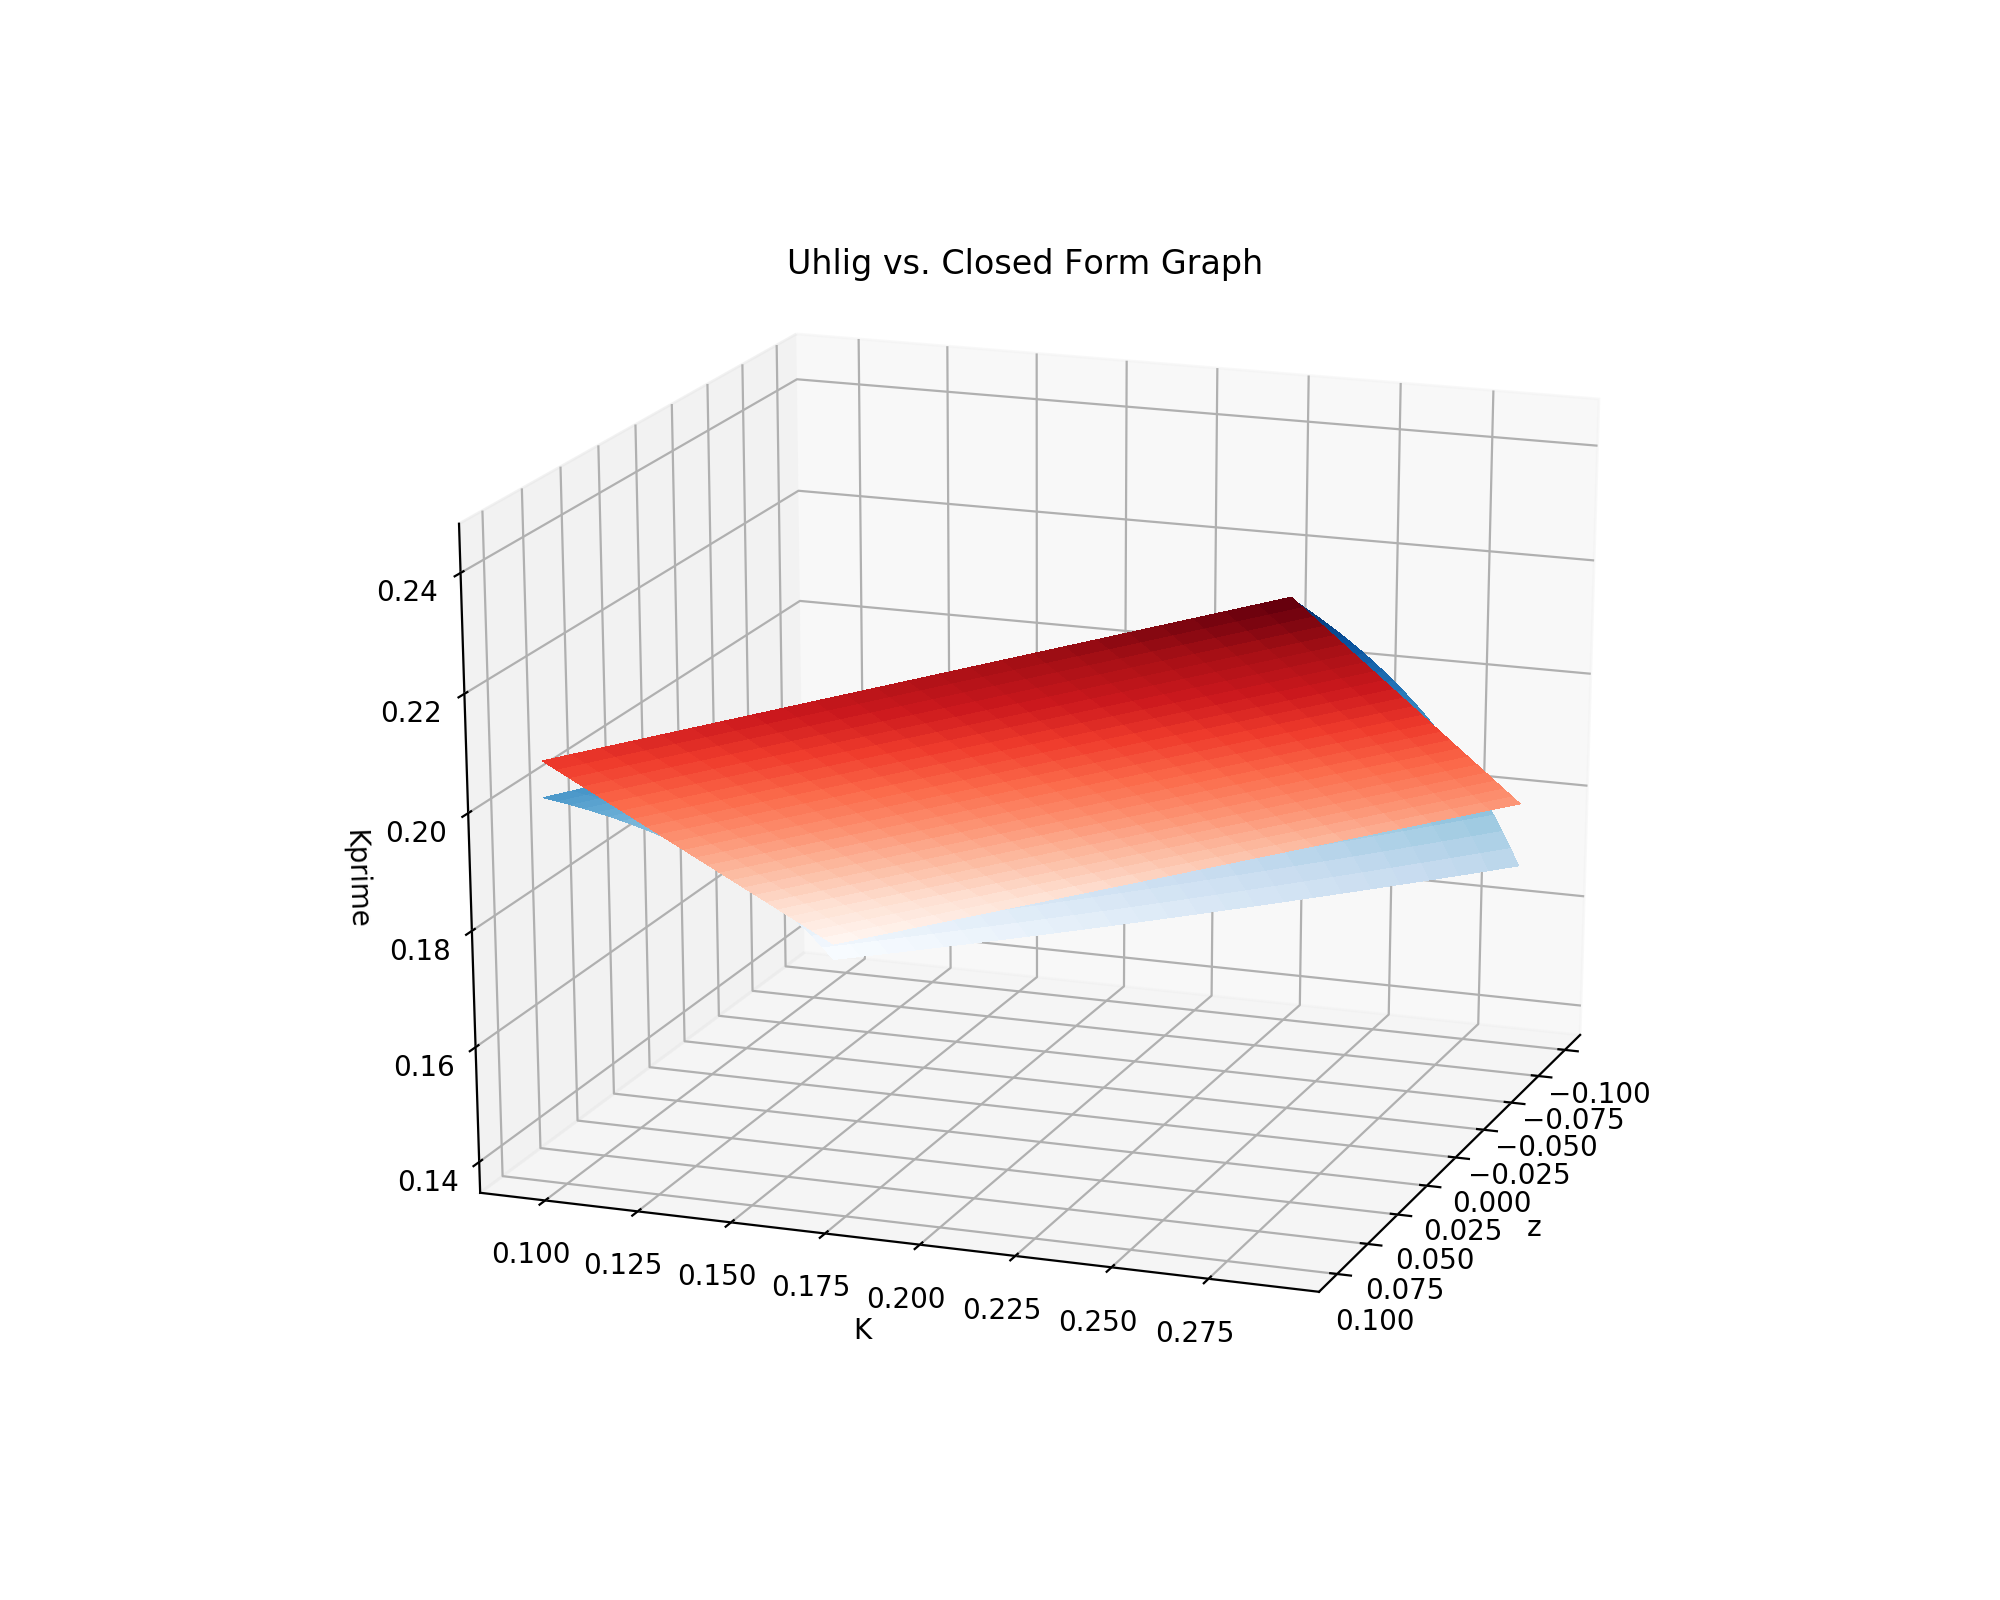

In [2]:
def rouwen(rho, mu, step, num):
    '''
    Adapted from Lu Zhang and Karen Kopecky. Python by Ben Tengelsen.
    Construct transition probability matrix for discretizing an AR(1)
    process. This procedure is from Rouwenhorst (1995), which works
    well for very persistent processes.
    INPUTS:
    rho  - persistence (close to one)
    mu   - mean and the middle point of the discrete state space
    step - step size of the even-spaced grid
    num  - number of grid points on the discretized process
    OUTPUT:
    dscSp  - discrete state space (num by 1 vector)
    transP - transition probability matrix over the grid
    '''

    # discrete state space
    dscSp = np.linspace(mu -(num-1)/2*step, mu +(num-1)/2*step, num).T

    # transition probability matrix
    q = p = (rho + 1)/2.
    transP = np.array([[p**2, p*(1-q), (1-q)**2], \
                    [2*p*(1-p), p*q+(1-p)*(1-q), 2*q*(1-q)], \
                    [(1-p)**2, (1-p)*q, q**2]]).T


    while transP.shape[0] <= num - 1:

        # see Rouwenhorst 1995
        len_P = transP.shape[0]
        transP = p * np.vstack((np.hstack((transP, np.zeros((len_P, 1)))), np.zeros((1, len_P+1)))) \
                + (1 - p) * np.vstack((np.hstack((np.zeros((len_P, 1)), transP)), np.zeros((1, len_P+1)))) \
                + (1 - q) * np.vstack((np.zeros((1, len_P+1)), np.hstack((transP, np.zeros((len_P, 1)))))) \
                + q * np.vstack((np.zeros((1, len_P+1)), np.hstack((np.zeros((len_P, 1)), transP))))

        transP[1:-1] /= 2.


    # ensure columns sum to 1
    if np.max(np.abs(np.sum(transP, axis=1) - np.ones(transP.shape))) >= 1e-12:
        print('Problem in rouwen routine!')
        return None
    else:
        return transP.T, dscSp
    

pi, zgrid = rouwen(rho, mu, step, num) #transP.T 
kgrid = np.linspace(0.5*kbar, 1.5*kbar, 25)
V = np.zeros((25,25))


%matplotlib notebook
kprime_closed = np.zeros((25,25))
ezvec = np.exp(zgrid)
for i in range(25): #z
    for j in range(25): #k
        kprime_closed[i,j] = A*ezvec[i]*(kgrid[j]**alpha)

kprime_uhlig = np.zeros((25,25))
for i in range(25):
    for j in range(25):
        kprime_uhlig[i,j] = kbar + P*(kgrid[j]-kbar) + Q*zgrid[i]

zmat, kmat = np.meshgrid(zgrid, kgrid)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(zmat, kmat, kprime_closed, rstride=1, cstride=1, cmap=cm.Blues,
                linewidth=0, antialiased=False)
ax.plot_surface(zmat, kmat, kprime_uhlig, rstride=1, cstride=1, cmap=cm.Reds,
                linewidth=0, antialiased=False)
ax.view_init(elev=20., azim=20.)  # to rotate plot for better view
ax.set_xlabel(r'z')
ax.set_ylabel(r'K')
ax.set_zlabel(r'Kprime')
plt.title("Uhlig vs. Closed Form Graph")

# Exercise 2

In [3]:
F2 = alpha*alpha*beta*np.exp(alpha*kbar)/(np.exp(alpha*kbar) - np.exp(kbar))
L2 = (alpha*beta*(np.exp((alpha-1)*kbar))*(np.exp(alpha*kbar)-np.exp(kbar)) - np.exp(2*alpha*kbar - kbar))/(np.exp(alpha*kbar) - np.exp(kbar))
G2 = (np.exp((alpha - 1) * kbar) * (alpha * np.exp(2 * kbar) - np.exp(2*alpha*kbar)+(1-alpha) * np.exp((alpha + 1) * kbar) )) / ((np.exp(alpha * kbar) - np.exp(kbar)) ** 2)
M2 = (alpha*beta*np.exp((alpha-1)*kbar)*np.exp(alpha*kbar))/(np.exp(alpha*kbar) - np.exp(kbar))
H2 = alpha*beta*(np.exp(2*alpha*kbar-kbar))/(np.exp(alpha*kbar) - np.exp(kbar))

num_P2_neg = -G - np.sqrt(G**2 - 4*F*H)
num_P2_pos = -G + np.sqrt(G**2 - 4*F*H)
den_P2 = 2*F
P2_neg = num_P_neg/den_P
P2_pos = num_P_pos/den_P

if abs(P2_neg) < 1:
    P2 = P2_neg
elif abs(P_pos) < 1:
    P2 = P2_pos
else:
    raise ValueError("Neither Ps are valid.")

num_Q2 = - L*N - M
den_Q2 = F*N + F*P + G
Q2 = num_Q2/den_Q2

print("F equals: ", F2)
print("G equals: ", G2)
print("H equals: ", H2)
print("L equals: ", L2)
print("M equals: ", M2)
print("N equals: ", rho)
print("P equals: ", P2)
print("Q equals: ", Q2)

F equals:  -0.899262300125
G equals:  9.23026282451
H equals:  -2.26671784868
L equals:  6.91110985629
M equals:  -2.26671784868
N equals:  0.9
P equals:  0.35
Q equals:  0.19278261945


# Exercise 3

$$ E_t [F\tilde{X}_{t+1} +GX_t +H\tilde{X}_{t-1} +L\tilde{Z}_{t+1} +M\tilde{Z}_t] $$
$$ = E_t [F(P\tilde{X}_t + Q\tilde{Z}_{t+1}) +G(P\tilde{X}_{t-1} + Q\tilde{Z}_{t}) +H\tilde{X}_{t-1} +L(N\tilde{Z}_t + \varepsilon_t)  +M\tilde{Z}_t]$$
$$ = E_t [F(P^2\tilde{X}_{t-1} + PQ\tilde{Z}_t + QNZ_{t-1} +Q\varepsilon_t) +G(P\tilde{X}_{t-1} + Q\tilde{Z}_{t}) +H\tilde{X}_{t-1} +L(N\tilde{Z}_t + \varepsilon_t)  +MZ_t] $$

Applying the Expectation Operator and using the fact that $E_t(\varepsilon_t)=0$ we get

$$ = F(P^2\tilde{X}_{t-1} + PQ\tilde{Z}_t + QN\tilde{Z}_{t-1}) +G(P\tilde{X}_{t-1} + Q\tilde{Z}_{t}) +H\tilde{X}_{t-1} +LN\tilde{Z}_t +  +M\tilde{Z}_t $$
$$ =  [P(FP +G)+H]\tilde{X}_{t-1} + [(FQ +L)N+(FQ+G)Q+M]\tilde{Z}_t$$

# Exercise 4

In [4]:
from scipy.optimize import fsolve
import math

gamma = 2.5
psi = 1.5
beta = 0.98
alpha = 0.40
a = 0.5
delta = 0.10
zbar = 0
rho = 0.9
tau = 0.05


def numerical(p):
    k, c, w, r, T, l = p
    eqn21 = c - (1-tau)*(w*l + (r-delta)*k) - T
    eqn25 = (c**-gamma) - beta*((c**-gamma)*((r-delta)*(1-tau)+1))
    eqn26 = a/((1-l)**psi) - (c**-gamma)*w*(1-tau)
    eqn27 = alpha*(k**(alpha-1))*((l*np.exp(zbar))**(1-alpha)) - r
    eqn28 = (1-alpha)*(k**alpha)*((l*np.exp(zbar))**(-alpha))*np.exp(zbar) - w
    eqn29 = tau*(w*l + (r-delta)*k) - T
    
    return (eqn21, eqn25, eqn26, eqn27, eqn28, eqn29)

k, c, w, r, T, l = fsolve(numerical, (0.5,0.5,0.5,0.5,0.5,0.5))
O = (k**alpha)*(l*(np.exp(zbar)))**(1-alpha)


ex6results = '''
kbar = %s
cbar = %s
wbar = %s
rbar = %s
Tbar = %s
Investment = %s
Output = %s
l = %s
'''
print(ex6results % (k, c, w, r, T, k, O, l))


kbar = 4.22522902602
cbar = 0.860703206171
wbar = 1.32795276816
rbar = 0.121482277128
Tbar = 0.0430351603085
Investment = 4.22522902602
Output = 1.28322610877
l = 0.579791453194



# Exercise 5

In [5]:
eps = 1e-3
names = np.array(["k","c","r","w","l","T","y","i"])


i = delta*k
y = (k**alpha)*(l*np.exp(zbar))**(1-alpha)

delta += eps
k1, c1, w1, r1, T1, l1 = fsolve(numerical, (0.5,0.5,0.5,0.5,0.5,0.5))
i1 = delta*k1
y1 = (k1**alpha)*(l*np.exp(zbar))**(1-alpha)
vec = np.array([k,c,r,w,l,T,y,i])
vec1 = np.array([k1,c1,r1,w1,l1,T1,y1,i1])

for i in range(8):
    print("d"+ names[i] + "/ddelta:" + " " + str((vec1[i]-vec[i])/eps))

delta -= eps

tau += eps
k1, c1, w1, r1, T1, l1 = fsolve(numerical, (0.5,0.5,0.5,0.5,0.5,0.5))
i1 = delta*k1
y1 = (k1**alpha)*(l*np.exp(zbar))**(1-alpha)
vec = np.array([k,c,r,w,l,T,y,i])
vec1 = np.array([k1,c1,r1,w1,l1,T1,y1,i1])

for i in range(8):
    print("d"+ names[i] + "/dtau:" + " " + str((vec1[i]-vec[i])/eps))

tau -= eps

zbar += eps
k1, c1, w1, r1, T1, l1 = fsolve(numerical, (0.5,0.5,0.5,0.5,0.5,0.5))
i1 = delta*k1
y1 = (k1**alpha)*(l*np.exp(zbar))**(1-alpha)
vec = np.array([k,c,r,w,l,T,y,i])
vec1 = np.array([k1,c1,r1,w1,l1,T1,y1,i1])

for i in range(8):
    print("d"+ names[i] + "/dzbar" + " " + str((vec1[i]-vec[i])/eps))

zbar -= eps


alpha += eps
k1, c1, w1, r1, T1, l1 = fsolve(numerical, (0.5,0.5,0.5,0.5,0.5,0.5))
i1 = delta*k1
y1 = (k1**alpha)*(l*np.exp(zbar))**(1-alpha)
vec = np.array([k,c,r,w,l,T,y,i])
vec1 = np.array([k1,c1,r1,w1,l1,T1,y1,i1])

for i in range(8):
    print("d"+ names[i] + "/dalpha:" + " " + str((vec1[i]-vec[i])/eps))

alpha -= eps

gamma += eps
k1, c1, w1, r1, T1, l1 = fsolve(numerical, (0.5,0.5,0.5,0.5,0.5,0.5))
i1 = delta*k1
y1 = (k1**alpha)*(l*np.exp(zbar))**(1-alpha)
vec = np.array([k,c,r,w,l,T,y,i])
vec1 = np.array([k1,c1,r1,w1,l1,T1,y1,i1])

for i in range(8):
    print("d"+ names[i] + "/dgamma:" + " " + str((vec1[i]-vec[i])/eps))

gamma -= eps

psi += eps
k1, c1, w1, r1, T1, l1 = fsolve(numerical, (0.5,0.5,0.5,0.5,0.5,0.5))
i1 = delta*k1
y1 = (k1**alpha)*(l*np.exp(zbar))**(1-alpha)
vec = np.array([k,c,r,w,l,T,y,i])
vec1 = np.array([k1,c1,r1,w1,l1,T1,y1,i1])

for i in range(8):
    print("d"+ names[i] + "/dpsi:" + " " + str((vec1[i]-vec[i])/eps))

psi -= eps

beta += eps
k1, c1, w1, r1, T1, l1 = fsolve(numerical, (0.5,0.5,0.5,0.5,0.5,0.5))
i1 = delta*k1
y1 = (k1**alpha)*(l*np.exp(zbar))**(1-alpha)
vec = np.array([k,c,r,w,l,T,y,i])
vec1 = np.array([k1,c1,r1,w1,l1,T1,y1,i1])

for i in range(8):
    print("d"+ names[i] + "/dbeta:" + " " + str((vec1[i]-vec[i])/eps))

beta -= eps


a += eps
k1, c1, w1, r1, T1, l1 = fsolve(numerical, (0.5,0.5,0.5,0.5,0.5,0.5))
i1 = delta*k1
y1 = (k1**alpha)*(l*np.exp(zbar))**(1-alpha)
vec = np.array([k,c,r,w,l,T,y,i])
vec1 = np.array([k1,c1,r1,w1,l1,T1,y1,i1])

for i in range(8):
    print("d"+ names[i] + "/da:" + " " + str((vec1[i]-vec[i])/eps))

a -= eps

dk/ddelta: -47.8973721268
dc/ddelta: -3.49097043027
dr/ddelta: 0.999999993234
dw/ddelta: -7.23787078831
dl/ddelta: 1.31325056351
dT/ddelta: -0.174548521513
dy/ddelta: -5.83859060707
di/ddelta: -0.612405558786
dk/dtau: -2.32449634347
dc/dtau: -0.234531054314
dr/dtau: 0.022636751052
dw/dtau: -0.164939657205
dl/dtau: -0.138996465016
dT/dtau: 0.848742122401
dy/dtau: -0.282431728664
di/dtau: -6577.70954703
dk/dzbar 2.83899583159
dc/dzbar 0.578319642564
dr/dzbar 7.96654409108e-10
dw/dzbar 1.32861694658
dl/dzbar -0.190320281611
dT/dzbar 0.0289159821282
dy/dzbar 1.11519182788
di/dzbar -6577.19319782
dk/dalpha: 26.0777868989
dc/dalpha: 2.09237810378
dr/dalpha: 3.74462960639e-09
dw/dalpha: 4.41515785862
dl/dalpha: -0.771335708493
dT/dalpha: 0.104618905189
dy/dalpha: 5.72758545084
di/dalpha: -6574.86931871
dk/dgamma: 0.138668646214
dc/dgamma: 0.028247601772
dr/dgamma: 1.86087256715e-10
dw/dgamma: -5.7167603984e-09
dl/dgamma: 0.0190283019077
dT/dgamma: 0.0014123800886
dy/dgamma: 0.0168456170531
di

# Exercise 6

In [14]:
def Modeldefs(Xp, X, Y, Z, params):
    '''    
    Inputs are:
        Xp: value of capital in next period
        X: value of capital this period
        Y: value of labor this period
        Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Y: GDP
        w: wage rate
        r: rental rate on capital
        c: consumption
        u: utiity
    '''
    # unpack input vectors
    kp = Xp
    k = X
    l = Y
    z = Z
    
    # unpacking parameters
    delta, tau, z_bar, alpha, gamma, psi, beta, a = params
    
    # find definintion values
    Y = (k**alpha)*(((np.exp(z)*l)**(1-alpha)))
    w = (1-alpha)*np.exp(z)*((k/(l*np.exp(z)))**alpha)
    r = alpha*((l*np.exp(z)/k)**(1-alpha))
    T = tau*(w*l+(r-delta)*k)
    c = (1-tau)*(w*l+(r-delta)*k)+k+T-kp
    u = (c**(1-gamma)-1)/(1-gamma)+a*(((1-l)**(1-psi))-1)/(1-psi)
    return Y,w,r,c,u

In [26]:
def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containing (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''

    # unpack theta0
    Xpp, Yp, Xp, Y, X, Y0, Zp, Z = theta0
    delta, tau, alpha, gamma, psi, beta, a = params
    
    r = alpha*(X**(alpha-1))*(Y*np.exp(Z))**(1-alpha)
    rp = alpha*(Xp**(alpha-1))*(Yp*np.exp(Zp))**(1-alpha)
    w = (1-alpha)*(X**alpha)*((Y*np.exp(Z))**(-alpha))*np.exp(Z)
    wp = (1-alpha)*(Xp**alpha)*((Yp*np.exp(Zp))**(-alpha))*np.exp(Zp)
    T = tau * (w*Y + (r-delta)*X)
    Tp = tau * (wp*Yp + (rp-delta)*Xp)
    c = (1-tau)*(w*Y + (r-delta)*X) + X + T - Xp
    cp = (1-tau)*(wp*Yp + (rp-delta)*Xp) + Xp + Tp - Xpp
   
    # Evaluate Euler equations
    
    E1 = (c**(-gamma)) - beta*((cp**(-gamma))*((rp-delta)*(1-tau)+1))
    E2 = a/((1-Y)**psi) - (c**(-gamma))*w*(1-tau)
    
    return np.array([E1, E2])

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

# make parameter list to pass to functions
params = (delta, tau, alpha, gamma, psi, beta, a)

# set LinApp parameters
Zbar = np.array([0.])
nx = 2
ny = 0
nz = 1
Sylv = 1

# take a guess for steady state values of k and ell
guessXY = np.array([.1, .25])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, ellbar) = XYbar
print ('XYbar: ', XYbar)

# set up steady state input vector
theta0 = np.array([kbar, ellbar, kbar, ellbar, kbar, ellbar, 0., 0.])

# check SS solution
check = Modeldyn(theta0, params)
print ('check: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')

# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, WW, TT] = \
    LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX=True)
print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)

# set value for NN    
NN = rho
    
# find the policy and jump function coefficients
PP, QQ, UU, RR, SS, VV = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,WW,TT,NN,Zbar,Sylv=0)
print ('PP:',PP)
print ('QQ', QQ)

XYbar:  [ 4.22522903  0.57979145]
check:  [ -7.77156117e-15  -2.26485497e-14]
FF:  [[-17.85678587   3.15518743]
 [  0.           0.        ]]
GG:  [[ 36.19591326  -3.25392452]
 [-22.52731982   8.63824988]]
HH:  [[-18.2403903    0.        ]
 [ 22.27702703   0.        ]]
LL:  [[ 3.15518743]
 [ 0.        ]]
MM:  [[-3.25392451]
 [ 3.00365877]]
Sylvester equation solver condition is not satisfied; proceed with the original method...
PP: [[ 0.9152937   0.        ]
 [-0.19192697  0.        ]]
QQ [[ 0.1289971 ]
 [-0.01131015]]


# Exercise 7

<IPython.core.display.Javascript object>


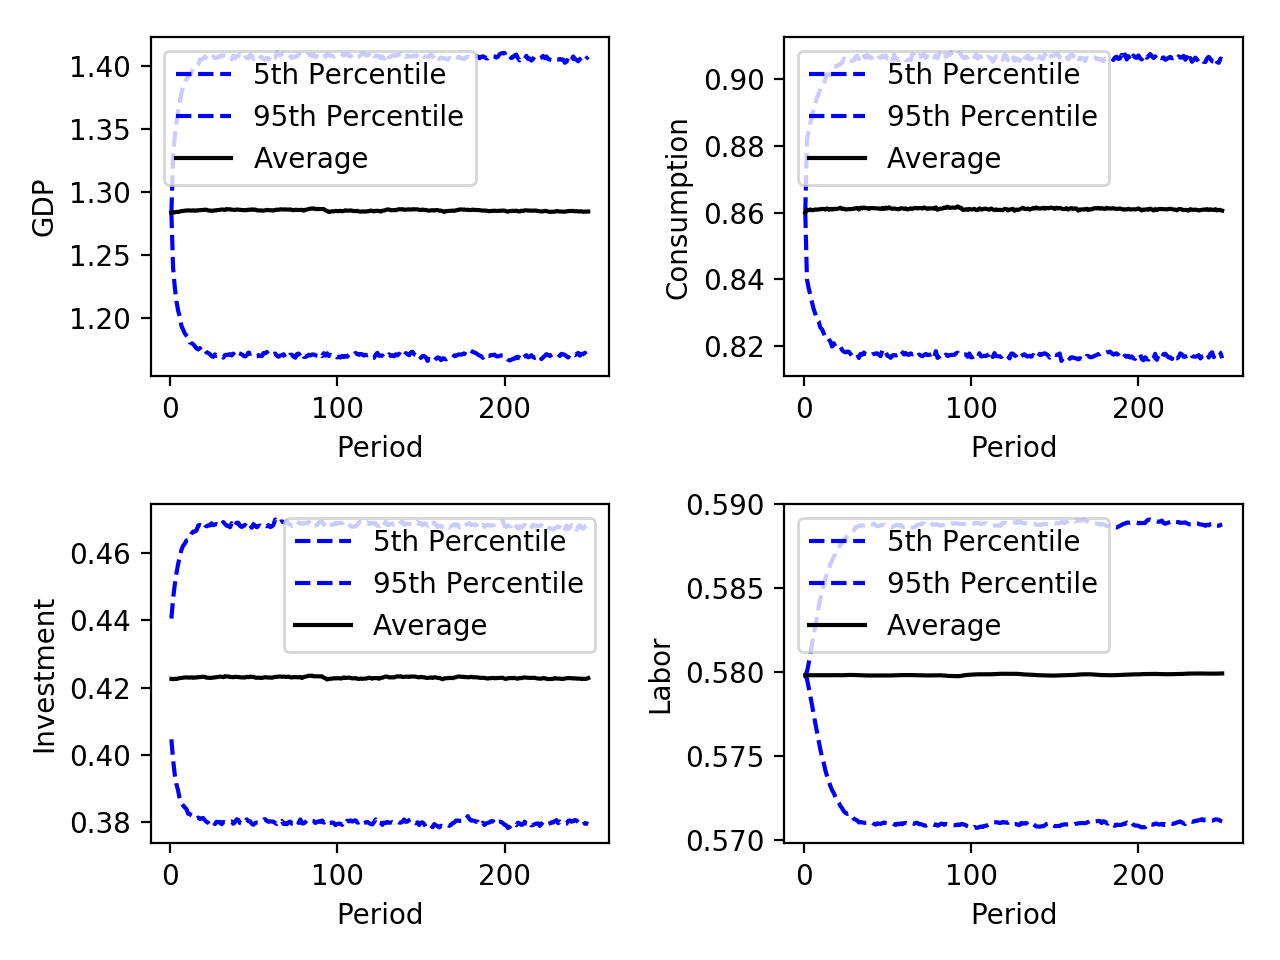

In [60]:
# Simulation

mu, sigma = 0, np.sqrt(0.0004)
eps = np.random.normal(mu, sigma, size=(10000, 251))

z = np.zeros((10000,251))
z[:,0] = np.zeros(10000)
for i in range(1, 251):
    z[:,i] = rho*z[:,i-1] + eps[:,i]

k = np.zeros((10000,251))
l = np.zeros((10000,251))
c = np.zeros((10000,251))
y = np.zeros((10000,251))
I = np.zeros((10000,251))
w = np.zeros((10000,251))
r = np.zeros((10000,251))


for i in range(1, 251):
    k[:, i] = PP[0, 0] * k[:, i - 1] + QQ[0, 0] * z[:, i] 
    l[:, i] = PP[1, 0] * k[:, i - 1] + QQ[1, 0] * z[:, i]
    
    
k = kbar * np.exp(k)
l = ellbar * np.exp(l)

for i in range(1, 251):
    w[:, i] = (1 - alpha) * (k[:, i]**alpha) * ((l[:, i]*np.exp(z[:, i]))**(-alpha)) * np.exp(z[:, i])
    r[:, i] = alpha*(k[:, i]**(alpha-1))*(l[:, i]*np.exp(z[:, i]))**(1-alpha)

for i in range(0, 250):
    y[:, i] = (k[:, i] ** alpha) * (l[:, i] ** (1 - alpha)) * np.exp(z[:, i])
    I[:, i] = k[:, i + 1] - (1 - delta) * k[:, i]
    c[:, i] = w[:, i] * l[:, i] + (r[:, i] - delta) * k[:, i] + k[:, i] - k[:, i+1]
    
y = y[:, 0:250]
I = I[:, 0:250]
c = c[:, 0:250]
l = l[:, 0:250]

c[:, 0] = 0.86

labels = np.array(['GDP', 'Consumption', 'Investment', 'Labor'])
values = np.array([y, c, I, l])

for i in range(len(values)):
    time = np.linspace(1,250,250)
    PCT5 = np.percentile(values[i], 5, axis=0)
    PCT95 = np.percentile(values[i], 95, axis=0)
    average = np.mean(values[i], axis=0)
    plt.subplot(str(22) + str(i+1))
    plt.plot(time, PCT5, 'b--', label='5th Percentile')
    plt.plot(time, PCT95, 'b--', label='95th Percentile')
    plt.plot(time, average, 'k-', label='Average')
    plt.xlabel('Period')
    plt.ylabel(labels[i])
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Exercise 8

In [110]:
from scipy import stats

ymean = y.mean(axis=1)
Imean = I.mean(axis=1)
cmean = c.mean(axis=1)
lmean = l.mean(axis=1)

label = np.array(["y", "I", "c", "l"])
one = np.array([ymean,Imean,cmean,lmean])

for i in range(4):
    print("Mean for mean: " + label[i] + " " + str(np.mean(one[i])))
    print("SD for mean: " + label[i] + " " +str(np.std(one[i])))

###########################################
ysd = y.std(axis=1)
Isd = I.std(axis=1)
csd = c.std(axis=1)
lsd = l.std(axis=1)

two = np.array([ysd,Isd,csd,lsd])

for i in range(4):
    print("Mean for sd: " + label[i] +" " +str(np.mean(two[i])))
    print("SD for sd: " + label[i] + " " +str(np.std(two[i])))


###########################################
ycv = ymean/ysd
Icv = Imean/ysd
ccv = cmean/ysd
lcv = lmean/ysd

three = np.array([ycv,Icv,ccv,lcv])

for i in range(4):
    print("Mean for cv: " + label[i] + " " +str(np.mean(three[i])))
    print("SD for cv: " + label[i] + " " +str(np.std(three[i])))
    
###########################################
yrv = ysd/ysd
Irv = Isd/ysd
crv = csd/ysd
lrv = lsd/ysd

four = np.array([yrv,Irv,crv,lrv])

for i in range(4):
    print("Mean for rv: " + label[i] +" " + str(np.mean(four[i])))
    print("SD for rv: " + label[i] +" " + str(np.std(four[i])))
    
###########################################
yp = np.delete(y, -1, axis=1)
ypp = np.delete(y, 1, axis=1)
yauto = np.zeros((10000,1))

for i in range(10000):
    y1 = yp[i,:]
    y2 = ypp[i,:]
    yauto[i] = stats.pearsonr(y1,y2)[0]

Ip = np.delete(I, -1, axis=1)
Ipp = np.delete(I, 1, axis=1)
Iauto = np.zeros((10000,1))

for i in range(10000):
    I1 = Ip[i,:]
    I2 = Ipp[i,:]
    Iauto[i] = stats.pearsonr(I1,I2)[0]
    
cp = np.delete(c, -1, axis=1)
cpp = np.delete(c, 1, axis=1)
cauto = np.zeros((10000,1))

for i in range(10000):
    c1 = cp[i,:]
    c2 = cpp[i,:]
    cauto[i] = stats.pearsonr(c1,c2)[0]
    
lp = np.delete(l, -1, axis=1)
lpp = np.delete(l, 1, axis=1)
lauto = np.zeros((10000,1))

for i in range(10000):
    l1 = lp[i,:]
    l2 = lpp[i,:]
    lauto[i] = stats.pearsonr(l1,l2)[0]

five = np.array([yauto,Iauto,cauto,lauto])

for i in range(4):
    print("Mean for auto: " + label[i] +" " + str(np.mean(five[i])))
    print("SD for auto: " + label[i] +" " + str(np.std(five[i])))
    
###########################################

ycy = np.zeros((10000,1))
for i in range(10000):
    ycy[i] = stats.pearsonr(y[i,:],y[i,:])[0]

Icy = np.zeros((10000,1))
for i in range(10000):
    Icy[i] = stats.pearsonr(I[i,:],y[i,:])[0]
    
ccy = np.zeros((10000,1))
for i in range(10000):
    ccy[i] = stats.pearsonr(c[i,:],y[i,:])[0]

lcy = np.zeros((10000,1))
for i in range(10000):
    lcy[i] = stats.pearsonr(l[i,:],y[i,:])[0]
    
six = np.array([ycy,Icy,ccy,lcy])

for i in range(4):
    print("Mean for cy: " + label[i] + " " +str(np.mean(six[i])))
    print("SD for cy: " + label[i] + " " +str(np.std(six[i])))

Mean for mean: y 1.28521701262
SD for mean: y 0.0224326344692
Mean for mean: I 0.42299021174
SD for mean: I 0.00792781964181
Mean for mean: c 0.861151711653
SD for mean: c 0.00815877418716
Mean for mean: l 0.579815714913
SD for mean: l 0.00210813966192
Mean for sd: y 0.0670027872471
SD for sd: y 0.0107635486687
Mean for sd: I 0.0253983599268
SD for sd: I 0.00379451108354
Mean for sd: c 0.0252862328819
SD for sd: c 0.00345318283416
Mean for sd: l 0.00473098294684
SD for sd: l 0.0010979207391
Mean for cv: y 19.664939696
SD for cv: y 3.09914248013
Mean for cv: I 6.47201700359
SD for cv: I 1.02032388522
Mean for cv: c 13.1787974874
SD for cv: c 2.08299551777
Mean for cv: l 8.87542413998
SD for cv: l 1.41382006888
Mean for rv: y 1.0
SD for rv: y 0.0
Mean for rv: I 0.379751069525
SD for rv: I 0.00579431486248
Mean for rv: c 0.378975860568
SD for rv: c 0.0128450544076
Mean for rv: l 0.0699152904095
SD for rv: l 0.0064235913707
Mean for auto: y 0.911034997717
SD for auto: y 0.0278700782706
Mea

# Exercise 9

<IPython.core.display.Javascript object>


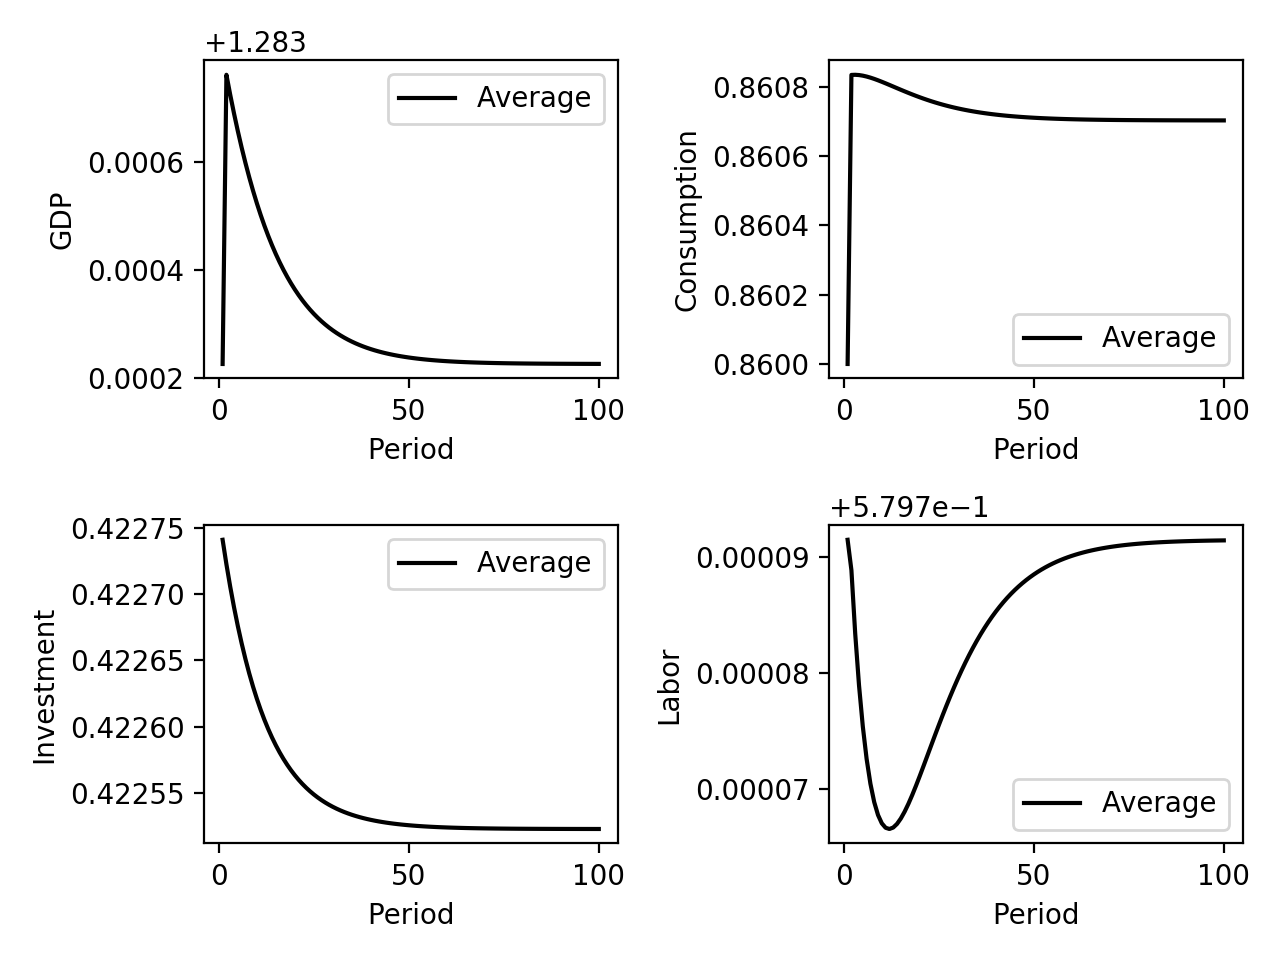

In [119]:
# Simulation

z = np.zeros((1,101))
z[:,0] = np.zeros(1)
for i in range(1, 101):
    if i == 1:
        z[:, i] = 0.0004
    else:
        z[:,i] = rho*z[:,i-1] 

k = np.zeros((1,101))
l = np.zeros((1,101))
c = np.zeros((1,101))
y = np.zeros((1,101))
I = np.zeros((1,101))
w = np.zeros((1,101))
r = np.zeros((1,101))


for i in range(1, 101):
    k[:, i] = PP[0, 0] * k[:, i - 1] + QQ[0, 0] * z[:, i] 
    l[:, i] = PP[1, 0] * k[:, i - 1] + QQ[1, 0] * z[:, i]
    
    
k = kbar * np.exp(k)
l = ellbar * np.exp(l)

for i in range(1, 101):
    w[:, i] = (1 - alpha) * (k[:, i]**alpha) * ((l[:, i]*np.exp(z[:, i]))**(-alpha)) * np.exp(z[:, i])
    r[:, i] = alpha*(k[:, i]**(alpha-1))*(l[:, i]*np.exp(z[:, i]))**(1-alpha)

for i in range(0, 100):
    y[:, i] = (k[:, i] ** alpha) * (l[:, i] ** (1 - alpha)) * np.exp(z[:, i])
    I[:, i] = k[:, i + 1] - (1 - delta) * k[:, i]
    c[:, i] = w[:, i] * l[:, i] + (r[:, i] - delta) * k[:, i] + k[:, i] - k[:, i+1]
    
y = y[:, 0:100]
I = I[:, 0:100]
c = c[:, 0:100]
l = l[:, 0:100]

c[:, 0] = 0.86

labels = np.array(['GDP', 'Consumption', 'Investment', 'Labor'])
values = np.array([y, c, I, l])

for i in range(len(values)):
    time = np.linspace(1,100,100)
    average = np.mean(values[i], axis=0)
    plt.subplot(str(22) + str(i+1))
    plt.plot(time, average, 'k-', label='Average')
    plt.xlabel('Period')
    plt.ylabel(labels[i])
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Exercise 10

In [140]:
# Define Variables
import numpy as np
import scipy.optimize as opt
import math as m

periods = 3
years = 20

dfacty = .96
dfact = dfacty ** 20
beta = dfact

delty = .05
delta = 1 - (1 - delty) ** 20

sigma = 3
A = 1  # TFP
alpha = .35

lone = 1
ltwo = 1
lthree = .2
labor = lone + ltwo + lthree

def Modeldyn2(theta1, params):

    '''
    no p = time 1
    p = time 2
    pp = time 3
    '''
    # unpack theta1
    k2pp, k3pp, k2p, k3p, k2, k3, Zp, Z = theta1
    A, alpha, beta, sigma, lone, ltwo, lthree, labor = params
    
    # find definitions for now and next period
    K = k2+k3
    Kp = k2p+k3p
    
    
    w =  (1-alpha)*np.exp(Z)*((K/labor)**alpha)
    wp = (1-alpha)*np.exp(Zp)*((Kp/labor)**alpha)

    r = alpha*np.exp(Z)*((labor/K)**(1-alpha))-delta
    rp = alpha*np.exp(Zp)*((labor/Kp)**(1-alpha))-delta
    
    c1 = w*lone - k2p
    c2 = w*ltwo + (1+r)*k2-k3p
    c2p = wp*ltwo + (1+rp)*k2p-k3pp
    c3p = wp*lthree + (1+rp)*k3p
    
    # Evaluate Euler equations
    E1 = c1**(-sigma)-beta*(1+rp)*(c2p**(-sigma))
    E2 = c2**(-sigma)-beta*(1+rp)*(c3p**(-sigma))
    
    return np.array([E1, E2])

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

# make parameter list to pass to functions
params = A, alpha, beta, sigma, lone, ltwo, lthree, labor

# set LinApp parameters
Zbar = np.array([0.])
nx = 2
ny = 0
nz = 1
Sylv = 1

# take a guess for steady state values of k and ell
guessXY = np.array([.025, .025])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn2, params, guessXY, Zbar, nx, ny)
(k2bar, k3bar) = XYbar
print ('XYbar: ', XYbar)

# set up steady state input vector
theta1 = np.array([k2bar, k3bar, k2bar, k3bar, k2bar, k3bar, 0, 0])

# check SS solution
check = Modeldyn2(theta1, params)
print ('check: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')

# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, WW, TT] = \
    LinApp_Deriv(Modeldyn2, params, theta1, nx, ny, nz, logX=True)
print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)

# set value for NN    
NN = dfacty
    
# find the policy and jump function coefficients
PP, QQ, UU, RR, SS, VV = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,WW,TT,NN,Zbar,Sylv)
print ('PP:',PP)
print ('QQ', QQ)




XYbar:  [ 0.01931274  0.05841159]
check:  [ -1.76066806e-09   1.07280584e-09]
FF:  [[   0.         -137.73170552]
 [   0.            0.        ]]
GG:  [[ 251.24888897  128.79694706]
 [ -18.77371404  305.15657848]]
HH:  [[ -47.53544329 -143.77149749]
 [-115.38666166  -37.37975925]]
LL:  [[ 468.11869861]
 [ 200.17332552]]
MM:  [[-546.59124782]
 [-405.73709328]]
Sylvester equation solver condition is not satisfied; proceed with the original method...
PP: [[ 0.03530577  0.63635012]
 [ 0.38029487  0.16164297]]
QQ [[ 0.58379203]
 [ 0.73578832]]


<IPython.core.display.Javascript object>


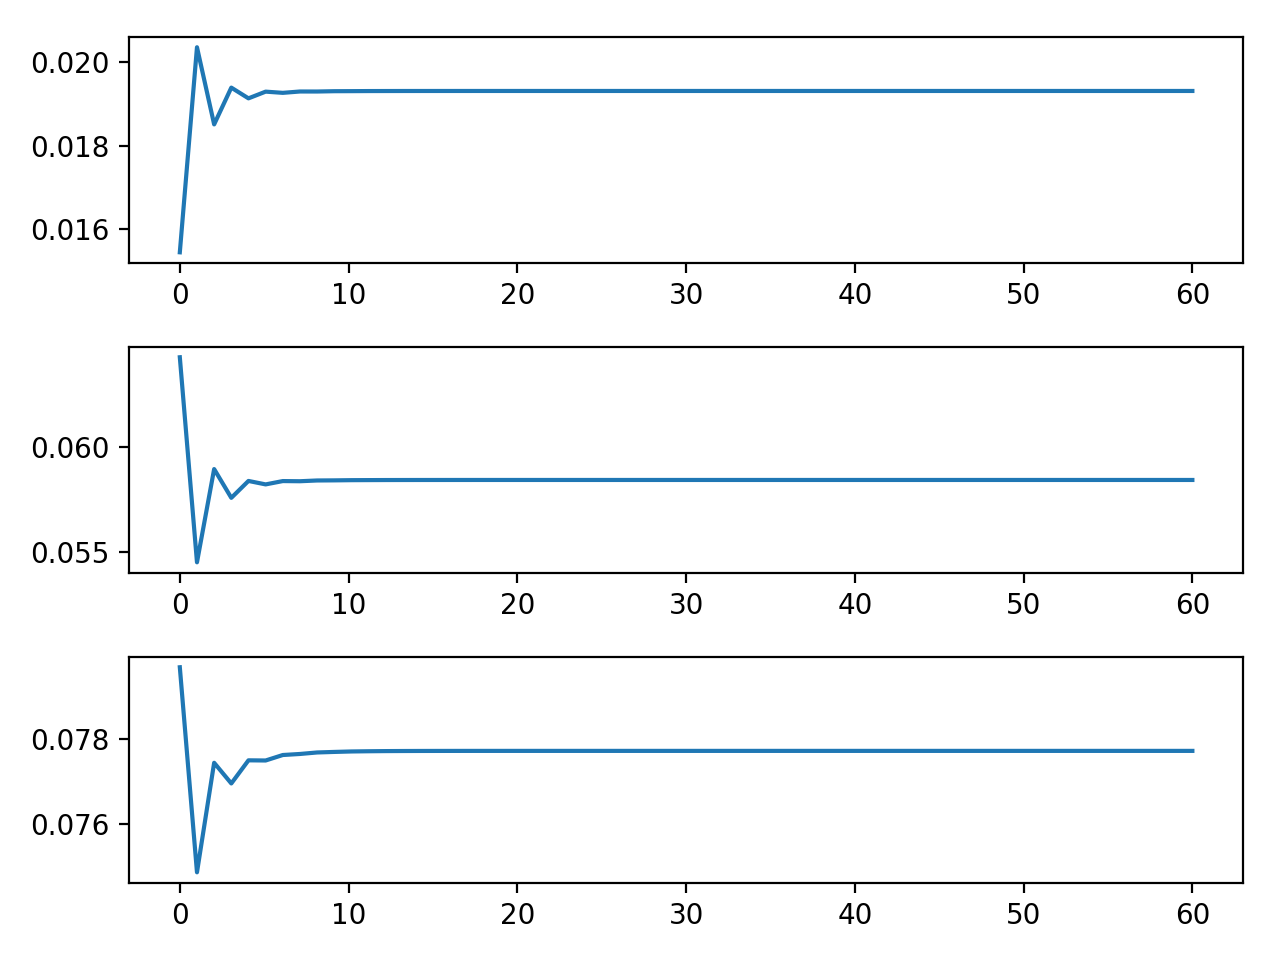

In [148]:
K_ss = np.array([[k2bar],[k3bar]])
K = np.zeros((2,60))
K[0,0] = np.log(0.8*k2bar)-np.log(k2bar)
K[1,0] = np.log(1.1*k3bar)-np.log(k3bar)

for i in range(1, 60):
    K[:, i] = PP @ K[:, i - 1]
K_l = K_ss*np.exp(K)
time = np.linspace(0, 60, 60)

plt.subplot(311)
plt.plot(time, K_l[0,:])
plt.subplot(312)
plt.plot(time, K_l[1,:])
plt.subplot(313)
plt.plot(time, np.sum(K_l, axis=0))
plt.tight_layout()

plt.show()

# Exercise 11

XYbar:  [ 0.01931274  0.05841159]
check:  [ -1.76066806e-09   1.07280584e-09]
FF:  [[   0.         -137.73170552]
 [   0.            0.        ]]
GG:  [[ 251.24888897  128.79694706]
 [ -18.77371404  305.15657848]]
HH:  [[ -47.53544329 -143.77149749]
 [-115.38666166  -37.37975925]]
LL:  [[ 468.11869861]
 [ 200.17332552]]
MM:  [[-546.59124782]
 [-405.73709328]]
Sylvester equation solver condition is not satisfied; proceed with the original method...
PP: [[ 0.03530577  0.63635012]
 [ 0.38029487  0.16164297]]
QQ [[ 0.58379203]
 [ 0.73578832]]


<IPython.core.display.Javascript object>


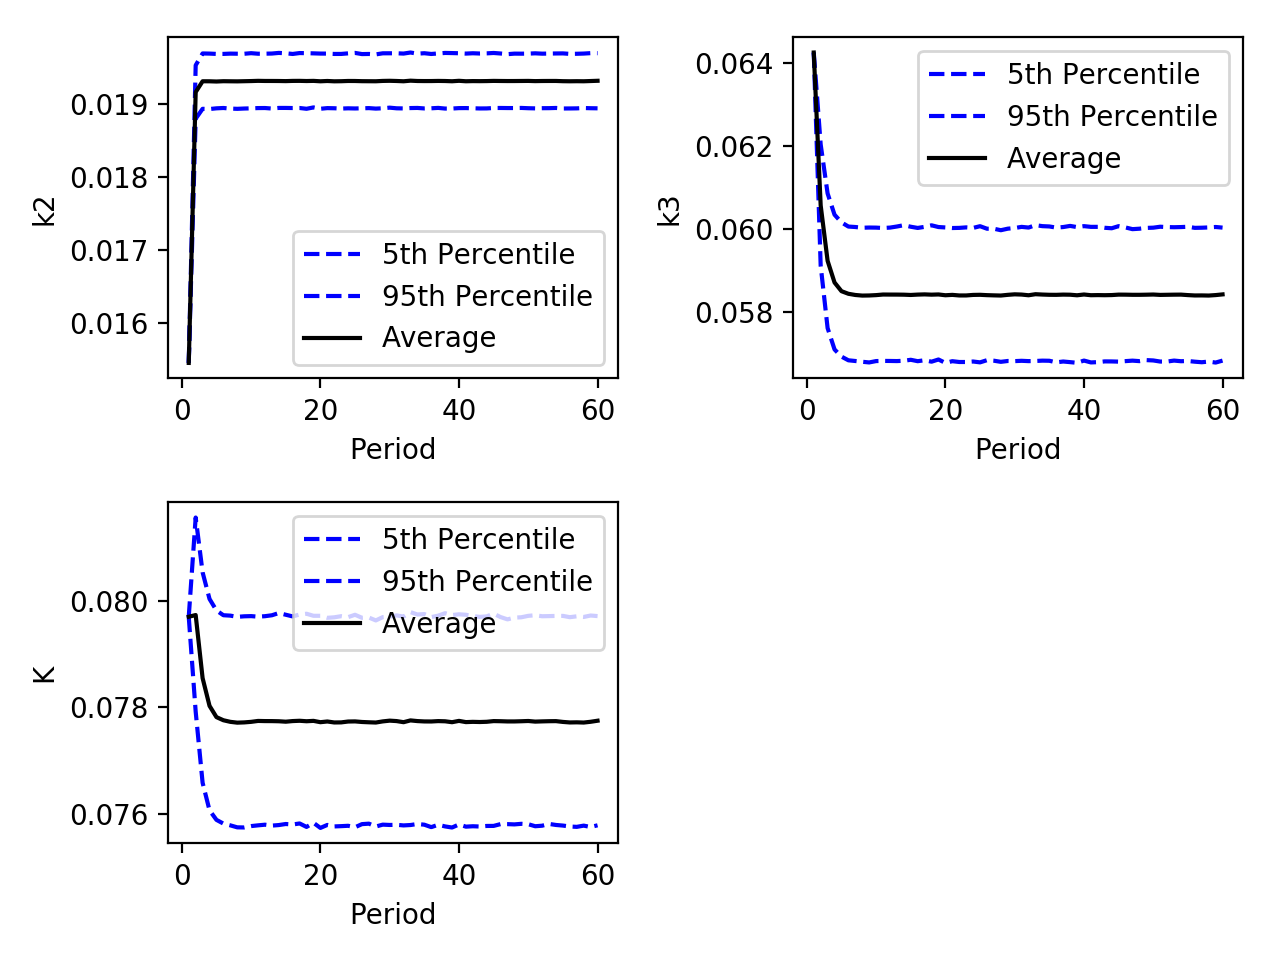

In [157]:
# Define Variables
import numpy as np
import scipy.optimize as opt
import math as m

periods = 3
years = 20

dfacty = .96
dfact = dfacty ** 20
beta = dfact

delty = .05
delta = 1 - (1 - delty) ** 20

sigma = 3
alpha = .35
rho = 0.9**20
lone = 1
ltwo = 1
lthree = .2
labor = lone + ltwo + lthree

def Modeldyn2(theta1, params):

    '''
    no p = time 1
    p = time 2
    pp = time 3
    '''
    # unpack theta1
    k2pp, k3pp, k2p, k3p, k2, k3, Zp, Z = theta1
    A, alpha, beta, sigma, lone, ltwo, lthree, labor = params
    
    # find definitions for now and next period
    K = k2+k3
    Kp = k2p+k3p
    
    
    w = (1-alpha)*np.exp(Z)*((K/labor)**alpha)
    wp = (1-alpha)*np.exp(Zp)*((Kp/labor)**alpha)

    r = alpha*np.exp(Z)*((labor/K)**(1-alpha))-delta
    rp = alpha*np.exp(Zp)*((labor/Kp)**(1-alpha))-delta
    
    c1 = w*lone - k2p
    c2 = w*ltwo + (1+r)*k2-k3p
    c2p = wp*ltwo + (1+rp)*k2p-k3pp
    c3p = wp*lthree + (1+rp)*k3p
    
    # Evaluate Euler equations
    E1 = c1**(-sigma)-beta*(1+rp)*(c2p**(-sigma))
    E2 = c2**(-sigma)-beta*(1+rp)*(c3p**(-sigma))
    
    return np.array([E1, E2])

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

# make parameter list to pass to functions
params = A, alpha, beta, sigma, lone, ltwo, lthree, labor

# set LinApp parameters
Zbar = np.array([0.])
nx = 2
ny = 0
nz = 1
Sylv = 1

# take a guess for steady state values of k and ell
guessXY = np.array([.025, .025])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn2, params, guessXY, Zbar, nx, ny)
(k2bar, k3bar) = XYbar
print ('XYbar: ', XYbar)

# set up steady state input vector
theta1 = np.array([k2bar, k3bar, k2bar, k3bar, k2bar, k3bar, 0, 0])

# check SS solution
check = Modeldyn2(theta1, params)
print ('check: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')

# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, WW, TT] = \
    LinApp_Deriv(Modeldyn2, params, theta1, nx, ny, nz, logX=True)
print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)

# set value for NN    
NN = dfacty
    
# find the policy and jump function coefficients
PP, QQ, UU, RR, SS, VV = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,WW,TT,NN,Zbar,Sylv)
print ('PP:',PP)
print ('QQ', QQ)

k2 = np.zeros((10000,60))
k3 = np.zeros((10000,60))
k2[:,0] = np.log(0.8*k2bar)-np.log(k2bar)
k3[:,0] = np.log(1.1*k3bar)-np.log(k3bar)

mu, sigma = 0, 0.02
eps = np.random.normal(mu, sigma, size=(10000, 61))

z = np.zeros((10000,61))
z[:,0] = np.zeros(10000)
for i in range(1, 61):
    z[:,i] = rho*z[:,i-1] + eps[:,i]


for i in range(1, 60):
    k2[:, i] = PP[0, 0] * k2[:, i - 1] + QQ[0, 0] * z[:, i] 
    k3[:, i] = PP[1, 0] * k3[:, i - 1] + QQ[1, 0] * z[:, i] 

k2 = k2bar*np.exp(k2)
k3 = k3bar*np.exp(k3)
K_sum = k2 + k3


labels = np.array(['k2', 'k3', 'K'])
values = np.array([k2, k3, K_sum])

for i in range(len(values)):
    time = np.linspace(1,60,60)
    PCT5 = np.percentile(values[i], 5, axis=0)
    PCT95 = np.percentile(values[i], 95, axis=0)
    average = np.mean(values[i], axis=0)
    plt.subplot(str(22) + str(i+1))
    plt.plot(time, PCT5, 'b--', label='5th Percentile')
    plt.plot(time, PCT95, 'b--', label='95th Percentile')
    plt.plot(time, average, 'k-', label='Average')
    plt.xlabel('Period')
    plt.ylabel(labels[i])
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

